In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
from patsy import dmatrices, Poly

from neuroCombat import neuroCombat

In [6]:
pheno_file = "data/abide1/Phenotypic_V1_0b.csv"
pheno_table = pd.read_csv(pheno_file)

# rename and recode columns in phenotypic table
rename_dict = {
  'SUB_ID': 'participant_id',
  'SITE_ID': 'site',
  'SEX': 'sex',
  'AGE_AT_SCAN': 'age'
}
sex_dict = {
  1: 'Male',
  2: 'Female'
}

pheno_table.rename(columns=rename_dict, inplace=True)
pheno_table['sex'] = pheno_table['sex'].map(sex_dict)
pheno_table


,site,participant_id,DX_GROUP,DSM_IV_TR,age,sex,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
0,CALTECH,51456,1,4,55.40,Male,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CALTECH,51457,1,4,22.90,Male,Ambi,NaN,107.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,CALTECH,51458,1,1,39.20,Male,R,NaN,93.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CALTECH,51459,1,1,22.80,Male,R,NaN,106.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CALTECH,51460,1,1,34.60,Female,Ambi,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,YALE,50624,1,3,11.08,Female,R,NaN,90.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1108,YALE,50625,1,3,7.00,Male,L,NaN,99.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1109,YALE,50626,1,3,11.08,Male,L,NaN,61.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1110,YALE,50627,1,3,9.50,Female,R,NaN,88.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [8]:
aseg_file = "data/abide1/fs-6.0.0.abide.aseg.csv"
aseg_table = pd.read_csv(aseg_file, sep='\t')
aseg_table.rename(columns = {aseg_table.columns[0]: 'participant_id'}, inplace=True)
aseg_table

,participant_id,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
0,50002,6795.0,128.9,16091.9,69823.4,8246.9,4585.2,6206.6,2433.7,1111.8,...,1.178499e+06,1.162577e+06,1159704.0,1873287.0,0.739239,1.026209,46.0,30.0,76.0,1.825444e+06
1,50003,7522.3,178.7,16025.3,67429.7,9688.5,3914.4,5586.8,2367.0,776.2,...,1.116107e+06,1.103638e+06,1100432.0,1769263.0,0.731629,1.007296,107.0,127.0,234.0,1.756448e+06
2,50004,7489.0,607.8,15851.3,70463.5,8066.5,3940.7,5397.6,2154.5,797.4,...,1.162371e+06,1.146088e+06,1143487.0,1826136.0,0.783234,1.073058,31.0,38.0,69.0,1.701806e+06
3,50005,7643.5,361.1,16423.0,64430.1,7888.1,4108.0,5784.7,2331.7,790.4,...,1.025767e+06,1.008729e+06,1005784.0,1636027.0,0.759772,1.045904,83.0,77.0,160.0,1.564223e+06
4,50006,4173.8,268.8,12938.5,71976.6,8383.8,3776.1,5400.0,2097.0,704.9,...,1.150942e+06,1.141858e+06,1138346.0,1699011.0,0.815125,1.051112,55.0,47.0,102.0,1.616394e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,51583,15427.7,565.5,14439.5,61665.9,8794.4,4750.6,6426.3,2361.2,1041.0,...,1.244557e+06,1.213413e+06,1210360.0,1935309.0,0.825391,1.144279,312.0,334.0,646.0,1.691291e+06
1081,51584,14100.3,378.8,15046.1,52082.5,8821.2,4304.7,5837.0,2129.6,1088.6,...,1.193655e+06,1.165903e+06,1162228.0,1754362.0,0.785714,1.039918,260.0,254.0,514.0,1.687019e+06
1082,51585,11869.0,388.5,12212.7,58642.5,7883.2,3670.3,5239.3,1890.0,814.2,...,1.100216e+06,1.075217e+06,1071602.0,1674198.0,0.780945,1.052622,193.0,228.0,421.0,1.590503e+06
1083,51606,8365.4,556.4,12518.6,46659.6,7313.2,3464.6,4685.3,1993.7,1321.6,...,1.056425e+06,1.037762e+06,1035171.0,1580106.0,0.809950,1.087467,42.0,34.0,76.0,1.453015e+06


In [9]:
aseg_and_pheno = pheno_table.merge(aseg_table, on="participant_id")

make basic test on sex effect

In [10]:
y, X = dmatrices('BrainSegVolNotVent ~ sex', data=aseg_and_pheno, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BrainSegVolNotVent   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     116.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           6.21e-26
Time:                        16:24:03   Log-Likelihood:                -14263.
No. Observations:                1085   AIC:                         2.853e+04
Df Residuals:                    1083   BIC:                         2.854e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.124e+06   9766.284    115.114      0.000    1.11e+06    1.14e+06
sex[T.Male]  1.144e+05   1.06e+04     10.809      0.000    9.36e+04    1.35e+05
==============================================================================
Omnibus:                       61.080   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.905
Skew:                          -0.223   Prob(JB):                     5.21e-40
Kurtosis:                       4.950   Cond. No.                         5.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


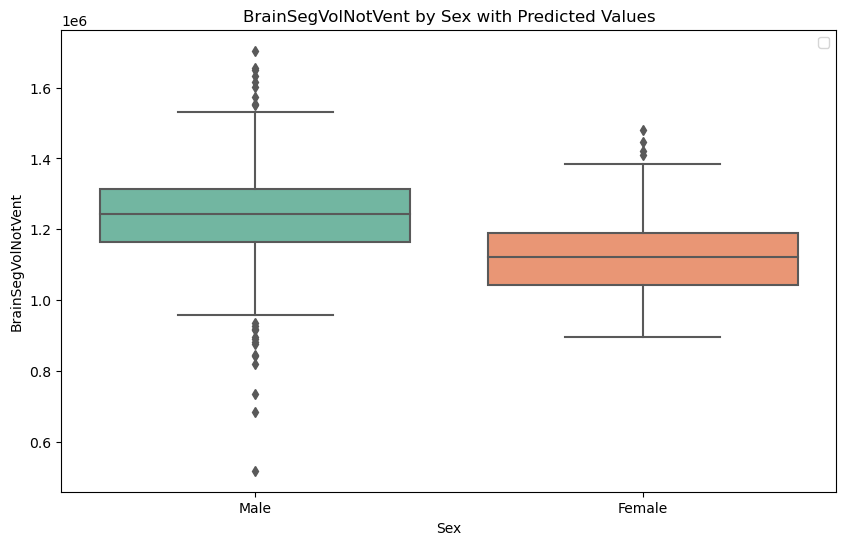

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='BrainSegVolNotVent', data=aseg_and_pheno, palette="Set2")

plt.xlabel('Sex')
plt.ylabel('BrainSegVolNotVent')
plt.title('BrainSegVolNotVent by Sex with Predicted Values')
plt.legend()
plt.show()

use neuroCombat to harmonize across centers

In [15]:
covars = aseg_and_pheno[['age']].copy()
covars['sex'] = pd.factorize(aseg_and_pheno['sex'])[0]
covars['center'] = pd.factorize(aseg_and_pheno['site'])[0]
covars['age_2'] = covars['age']**2

# include ICV as with only one column combat generates nan
dat = aseg_and_pheno[['BrainSegVolNotVent', 'EstimatedTotalIntraCranialVol']].T

res_combat = neuroCombat(dat=dat,
                         covars=covars,
                         batch_col='center',
                         categorical_cols='sex',
                         continuous_cols=['age', 'age_2'])

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


In [16]:
aseg_and_pheno['BrainSegVolNotVent2'] = res_combat['data'][0]
y, X = dmatrices('BrainSegVolNotVent2 ~ sex + age + I(age**2)', data=aseg_and_pheno, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BrainSegVolNotVent2   R-squared:                       0.108
Model:                             OLS   Adj. R-squared:                  0.106
Method:                  Least Squares   F-statistic:                     43.70
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):           1.18e-26
Time:                         16:39:52   Log-Likelihood:                -14155.
No. Observations:                 1085   AIC:                         2.832e+04
Df Residuals:                     1081   BIC:                         2.834e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.093e+06    1.8e+04     60.693      0.000    1.06e+06    1.13e+06
sex[T.Male]  1.015e+05   9615.059     10.558      0.000    8.27e+04     1.2e+05
age          4959.2147   1544.669      3.211      0.001    1928.325    7990.105
I(age ** 2)  -121.4166     30.758     -3.947      0.000    -181.770     -61.064
==============================================================================
Omnibus:                       24.627   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.753
Skew:                          -0.079   Prob(JB):                     2.59e-11
Kurtosis:                       4.026   Cond. No.                     2.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

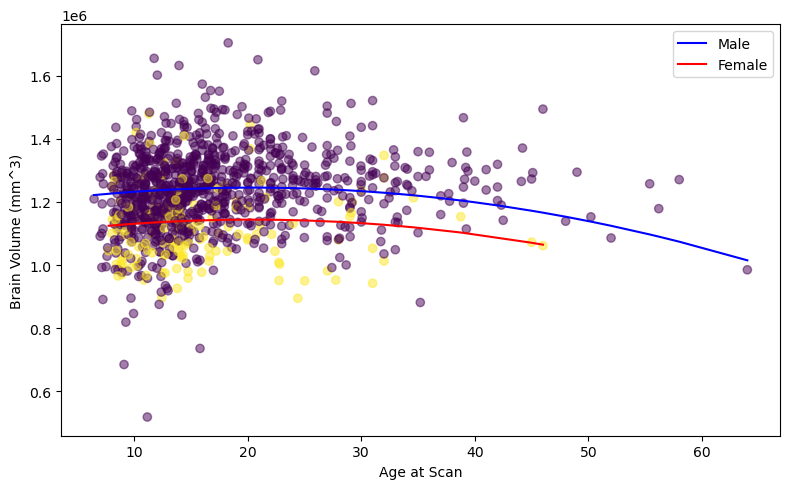

In [19]:
import matplotlib.pyplot as plt

genders = aseg_and_pheno['sex'].unique()

# Create a figure with subplots for each site
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

colors = ['blue', 'red']
for j, gender in enumerate(genders):
    data_subset = aseg_and_pheno[(aseg_and_pheno['sex'] == gender)]
    X_subset = X[(aseg_and_pheno['sex'] == gender)].sort_values(by='age')
    # Plot the fitted curve
    ax.plot(X_subset['age'], res.predict(X_subset), color=colors[j])

ax.scatter(aseg_and_pheno['age'], aseg_and_pheno['BrainSegVolNotVent'], c=pd.factorize(aseg_and_pheno['sex'])[0], alpha=0.5)

# Set the title and axis labels
ax.legend(['Male', 'Female'])
ax.set_xlabel('Age at Scan')
ax.set_ylabel('Brain Volume (mm^3)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()